In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
import skimage
from skimage import data, io, draw, color
import numpy as np
from matplotlib import cm
import nltk
from nltk.corpus import stopwords
import string

In [2]:
caperucita = io.imread("caperucita.png")

In [4]:
cap_gray = color.rgb2gray(caperucita)

In [5]:
stopwords_eng =  set(stopwords.words('english')).union(set(list(string.punctuation))).union(set(list(string.digits))).union(set(np.array(list(string.digits),dtype=int)))

In [7]:
new_cap = np.zeros(cap_gray.shape)
avgn = np.mean(cap_gray)
for x in range(cap_gray.shape[0]):
    for y in range(cap_gray.shape[1]):
        if cap_gray[x,y] < avgn:
            new_cap[x,y] = 0
        else:
            new_cap[x,y] = 1
new_cap=np.rot90(new_cap)
new_cap=np.rot90(new_cap)
new_cap = np.rot90(new_cap)

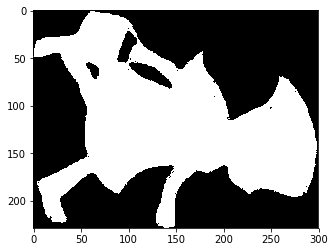

In [8]:
plt.imshow(new_cap,cmap=cm.gray);

In [10]:
f=open("txanogorritxu_en_tokens.txt",encoding="utf8")
words = [word.lower() for line in f for word in line.split()]
f.close()

word_dict={}
for word in words:
    word_dict[word] = word_dict.get(word,0)+1
    
word_dict_filt = {each_word:word_dict[each_word] for each_word in word_dict.keys() if each_word not in (stopwords_eng)}

In [11]:
def get_random_pos (matrix):
    pos = None
    flat_mat = matrix.reshape(-1)
    pos = np.random.choice(len(flat_mat))
    while flat_mat[int(pos)] !=1.0:
        pos = np.random.choice(len(flat_mat))
    return (pos//matrix.shape[1],pos%matrix.shape[1])
    
#get_random_pos(mat),mat

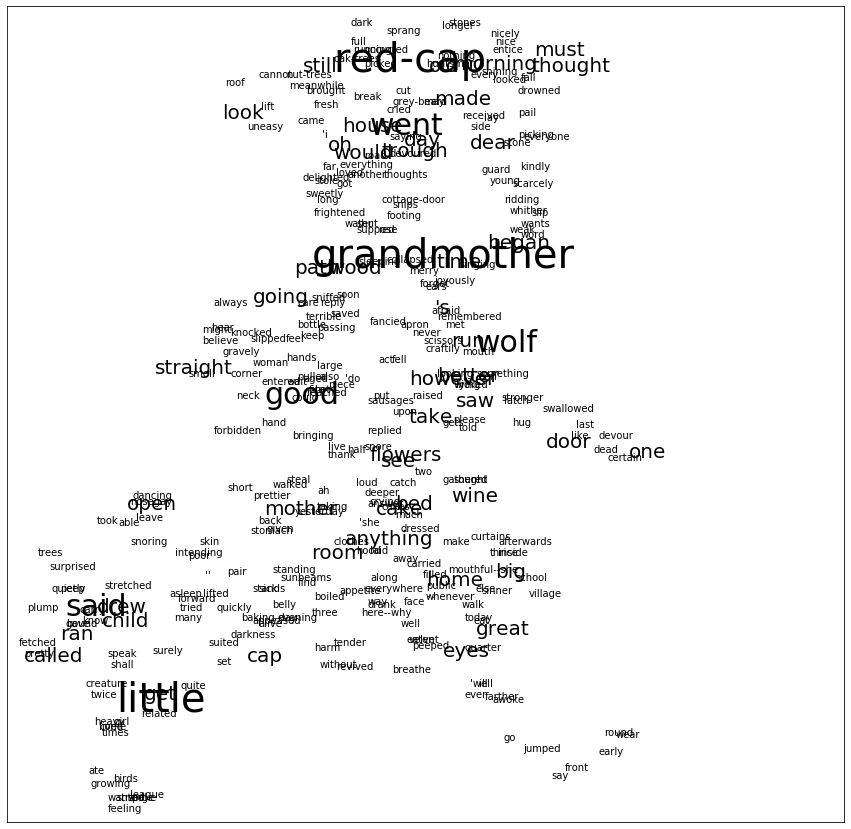

In [12]:
fig = plt.figure(figsize=(15,15))

plt.axis([0,new_cap.shape[1],0,new_cap.shape[1]])
for word in list(word_dict_filt.keys()):
    x,y = get_random_pos(new_cap)
    if (x==0 and y==0):
        pass
    else:
        plt.text(x,y,s=word,fontsize=(int(np.log(word_dict_filt[word])) + 1)*10,color="black");

cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)

plt.savefig("wordcloud.png")